In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_csv(f'{Project}/Documents/Revision_prep/Experiments/Glu_Gln_Conc_MSO/v20241009/Glu-Gln-Conc-MSO_result.tsv', sep='\t')
data['Cond'] = data['Diff']+'_'+data['Treat']
data['Cond'] = pd.Categorical(data['Cond'], categories=['D0_none','D0_MSO','D4_none','D4_MSO'])

data_dict = {k1 : {k2: list(df2['Conc']) for k2, df2 in df1.groupby('AA')} for k1, df1 in data.groupby('Cond')}

display(data, data_dict)

,Diff,Treat,AA,Conc,Cond
0,D0,none,Glu,3.900972,D0_none
1,D0,none,Glu,4.093330,D0_none
2,D0,none,Glu,3.756467,D0_none
3,D0,none,Glu,3.894990,D0_none
4,D4,none,Glu,2.902033,D4_none
5,D4,none,Glu,3.061334,D4_none
6,D4,none,Glu,3.114225,D4_none
7,D4,none,Glu,2.636321,D4_none
8,D0,MSO,Glu,2.906755,D0_MSO
9,D0,MSO,Glu,3.951973,D0_MSO


{'D0_none': {'Gln': [1.919159616, 1.244027941, 1.747790417, 1.860237398],
  'Glu': [3.900972, 4.09333, 3.756467, 3.894990193]},
 'D0_MSO': {'Gln': [0.571145205, 1.041173587], 'Glu': [2.906755, 3.951973]},
 'D4_none': {'Gln': [5.208458712, 5.115802399, 5.071723183, 4.067796534],
  'Glu': [2.902033, 3.061334, 3.114225, 2.636320706]},
 'D4_MSO': {'Gln': [1.833250123, 1.020033554], 'Glu': [4.792241, 3.768431]}}

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_64761/2157167278.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0d\n-','0d\n+','4d\n-','4d\n+'])


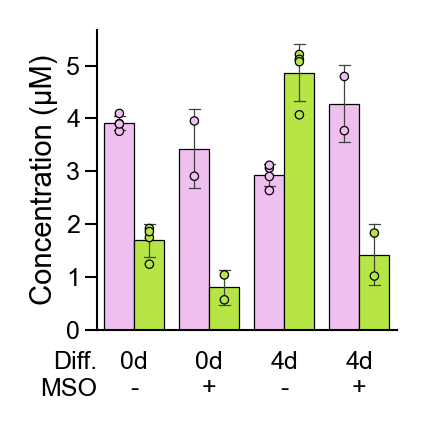

<Figure size 640x480 with 0 Axes>

In [4]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=data, x="Cond", y='Conc',
            hue='AA',
            palette=['#EFBFEF','#B6E545'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=data, x="Cond", y='Conc',
              hue='AA', dodge=True,
            palette=['#EFBFEF','#B6E545'],
            size=2, linewidth=0.3, edgecolor='k',
            jitter=False,
            legend=False)

ax.set_xticklabels(['0d\n-','0d\n+','4d\n-','4d\n+'])
ax.tick_params(width=0.5, length=3, pad=1)
ax.tick_params(axis='x', length=0, pad=5)
ax.text(0, -0.07, 'Diff.', transform=ax.transAxes, ha='right', va='top', fontsize=6)
ax.text(0, -0.16, 'MSO', transform=ax.transAxes, ha='right', va='top', fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Concentration (\u00B5M)', labelpad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# # paired T-test
# from scipy import stats
# for i, Cond in enumerate(data_dict):
#   stat, pv = stats.ttest_ind(data_dict[Cond]['Glu'], data_dict[Cond]['Gln'])
#   ax.text(i, 5.5,f'{pv:.4f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=45)


plt.savefig('Glu-Gln-Conc-MSO_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()